You have implemented LeNet and tested it on the MNIST data to recognize the digit.
You have tried to limit overfitting (using regularitation, or data augmentation)
today, I want you to change LeNet to obtain better results. You should be able to go over 80% accuracy on a test set (prepare data to have training, validation and test sets).

The next assignment will be to implement, or to use an existing implementation for the new dataset below.
You can run the next cells which allow you to get the project data ; these are satellite images of size 64x64 associated to 10 types of land cover : 'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'

You should try to adapt your LeNet implementation to this dataset and observe the results.


In [1]:
!pip install tensorflow
!pip install keras
!pip install seaborn
!pip install pillow h5py scikit-learn

     |████████████████████████████████| 285 kB 912 kB/s 
     |████████████████████████████████| 11.6 MB 638 kB/s 
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 9.5 MB 104 kB/s 
     |████████████████████████████████| 2.2 MB 113 kB/s 
     |████████████████████████████████| 509 kB 3.7 MB/s 
     |████████████████████████████████| 22.3 MB 49 kB/s 
     |████████████████████████████████| 302 kB 4.6 MB/s 


In [1]:
!git clone https://github.com/axelcarlier/land.git

Cloning into 'land'...
remote: Enumerating objects: 20004, done.
remote: Counting objects: 100% (20004/20004), done.
remote: Compressing objects: 100% (17392/17392), done.
remote: Total 20004 (delta 2612), reused 20004 (delta 2612), pack-reused 0
Receiving objects: 100% (20004/20004), 25.29 MiB | 5.41 MiB/s, done.
Resolving deltas: 100% (2612/2612), done.


In [4]:
import numpy as np
import PIL
from PIL import Image

path = 'land/'

X = np.zeros((20000, 64, 64, 3))
for i in range(20000):
  X[i] = np.array(Image.open(path+'Data/image_'+str(i).zfill(5) + '.jpg'))

# Load npy
y = np.load(path+'y_train.npy')

# Assign a number to each class
class_names = ('AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake')
Y = np.zeros((y.shape))
for i in range(0,10):
  Y[np.where(y == class_names[i])] = i

In [5]:
# print(X[2])
print(Y[2])
for i in Y:
    print(i)

7.0
4.0
6.0
0.0
0.0
7.0
2.0
6.0
9.0
0.0
7.0
8.0
2.0
6.0
5.0
1.0
0.0
4.0
8.0
3.0
1.0
1.0
9.0
8.0
0.0
3.0
3.0
0.0
1.0
1.0
6.0
6.0
2.0
9.0
1.0
8.0
0.0
9.0
6.0
6.0
3.0
2.0
8.0
3.0
7.0
7.0
7.0
6.0
6.0
3.0
6.0
7.0
2.0
9.0
1.0
4.0
2.0
6.0
4.0
6.0
7.0
8.0
4.0
0.0
2.0
3.0
9.0
7.0
4.0
0.0
3.0
9.0
9.0
1.0
8.0
3.0
7.0
8.0
0.0
9.0
5.0
5.0
6.0
7.0
7.0
6.0
8.0
2.0
1.0
5.0
2.0
7.0
3.0
0.0
2.0
9.0
7.0
6.0
3.0
2.0
5.0
2.0
1.0
6.0
0.0
6.0
7.0
4.0
4.0
6.0
6.0
2.0
7.0
3.0
6.0
4.0
4.0
4.0
0.0
8.0
9.0
4.0
7.0
9.0
6.0
0.0
9.0
2.0
6.0
7.0
7.0
6.0
4.0
4.0
3.0
5.0
2.0
7.0
9.0
9.0
8.0
3.0
8.0
8.0
6.0
6.0
4.0
2.0
0.0
2.0
2.0
6.0
0.0
7.0
1.0
9.0
0.0
0.0
3.0
6.0
2.0
8.0
7.0
3.0
9.0
2.0
4.0
7.0
8.0
6.0
0.0
9.0
1.0
3.0
9.0
1.0
0.0
4.0
0.0
8.0
5.0
7.0
1.0
3.0
6.0
5.0
1.0
3.0
0.0
9.0
7.0
3.0
6.0
5.0
7.0
6.0
1.0
8.0
4.0
2.0
8.0
0.0
4.0
5.0
8.0
1.0
9.0
6.0
7.0
9.0
6.0
3.0
7.0
7.0
0.0
2.0
9.0
7.0
2.0
0.0
7.0
5.0
4.0
8.0
4.0
9.0
7.0
0.0
3.0
0.0
7.0
4.0
0.0
8.0
1.0
9.0
4.0
9.0
1.0
0.0
0.0
0.0
9.0
9.0
7.0
7.0
0.0
2.0
1.0
0.0


In [7]:
from sklearn.model_selection import train_test_split

input_shape = (64, 64, 3)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14000, 64, 64, 3) (14000,) (6000, 64, 64, 3) (6000,)


[[[0.23921569 0.24313725 0.36078431]
  [0.24705882 0.25098039 0.36862745]
  [0.25490196 0.25882353 0.36862745]
  ...
  [0.15294118 0.23529412 0.31764706]
  [0.14509804 0.22745098 0.30980392]
  [0.14901961 0.23137255 0.31372549]]

 [[0.24705882 0.24313725 0.36470588]
  [0.25882353 0.25490196 0.37647059]
  [0.2627451  0.2627451  0.37254902]
  ...
  [0.14117647 0.22745098 0.30980392]
  [0.14117647 0.22745098 0.30980392]
  [0.14509804 0.23137255 0.31372549]]

 [[0.24705882 0.24313725 0.36470588]
  [0.25490196 0.25490196 0.36470588]
  [0.2627451  0.2627451  0.37254902]
  ...
  [0.1254902  0.22352941 0.30196078]
  [0.13333333 0.23137255 0.30980392]
  [0.14117647 0.23921569 0.31764706]]

 ...

 [[0.09019608 0.2627451  0.29803922]
  [0.09411765 0.2627451  0.29803922]
  [0.11764706 0.2745098  0.31372549]
  ...
  [0.17647059 0.3254902  0.36078431]
  [0.18431373 0.33333333 0.36862745]
  [0.17647059 0.3254902  0.36078431]]

 [[0.08627451 0.27843137 0.30588235]
  [0.08627451 0.27058824 0.30196078]


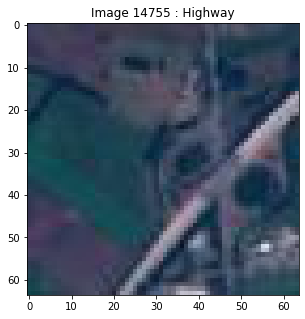

In [23]:
# Visualize samples from the database
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
num = np.random.randint(X.shape[0])
plt.title("Image {} : {}".format(num, y[num]))
plt.imshow(X[num]/255);
print(X[num]/255)

In [ ]:
X.shape, Y.shape

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', input_shape=X.shape, padding='same'), # C1
    # layers.AveragePooling2D(), # S2
    layers.MaxPool2D(strides=2),
    layers.Conv2D(48, kernel_size=3, strides=1, activation='relu', padding='valid'), # C3
    # layers.AveragePooling2D(), # S4
    layers.MaxPool2D(strides=2),
    layers.Flatten(), # Flatten
    layers.Dense(256, activation='relu'), # C5
    layers.Dense(84, activation='relu'), # F6
    layers.Dense(10, activation='softmax') # Output layer
])

NameError: name 'X' is not defined